In [181]:
import tskit
import numpy as np

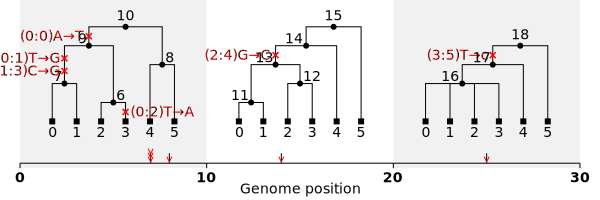

In [182]:
ts = tskit.load("../trees/case4.tree")
# ts = tskit.load("../trees/case2.tree")
# ts = tskit.load("../tree-simple-1.tree")
# ts = tskit.load("../test.tree")

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}:{mut.id}){prev}→{mut.derived_state}"

ts.draw_svg(mutation_labels=mut_labels)

In [183]:
# curr_
# for n in postorder_traversal(8, left_child, right_child):
#     if ts.node(n).flag & 1:

In [11]:
list(ts.at_index(2).nodes(17, order='preorder'))

[17, 4, 16, 0, 1, 2, 3]

In [12]:
# stack = [17]
# while stack:
#     node = stack.pop()
#     print(node)
#     u = right_child[node]
#     while u != tskit.NULL:
#         stack.append(u)
#         u = left_sib[u]

In [118]:
t_idx = 0

node_to_mut = dict()
for i, row in enumerate(ts.at_index(t_idx).mutations()):
    node_to_mut.setdefault(row.node, list()).append(i)

stack = [max(node_to_mut)]
mut_stacks = [[] for _ in range(ts.at_index(t_idx).num_mutations)]

# preorder traversal
while stack:
    node = stack.pop()
    if node in node_to_mut:
        for mut in node_to_mut[node]:
            mut_stacks[mut].append(node)
            print('cond0')
            print(mut_stacks)
    for s in mut_stacks:
        if s and (s[-1] == parent[node] or s[-1] == left_sib[node]):
            s.append(node)
            print('cond1')
            print(mut_stacks)
        elif s and s[0] == parent[node]:
            s.append(node)
            print('cond2')
            print(mut_stacks)

    u = right_child[node]
    while u != tskit.NULL:
        print(f'adding {u}')
        stack.append(u)
        u = left_sib[u]
    # if right_child[node] != tskit.NULL:
    #     stack.append(right_child[node])
    # if left_child[node] != tskit.NULL:
    #     stack.append(left_child[node])
    # if right_sib[node] != tskit.NULL:
    #     stack.append(right_sib[node])


# # TODO: can't be a while loop, samples are interleaved :/
# for i in range(len(mut_stacks)):
#     j = len(mut_stacks[i]) - 1
#     print(ts.mutation(i))
#     while ts.node(mut_stacks[i][j]).flags & 1:
#         print(mut_stacks[i][j])
#         j -= 1

cond0
[[9], [], [], []]
adding 7
adding 6
cond1
[[9, 6], [], [], []]
adding 3
adding 2
cond1
[[9, 6, 2], [], [], []]
cond0
[[9, 6, 2], [], [3], []]
cond1
[[9, 6, 2, 3], [], [3], []]
cond0
[[9, 6, 2, 3], [7], [3], []]
cond0
[[9, 6, 2, 3], [7], [3], [7]]
cond2
[[9, 6, 2, 3, 7], [7], [3], [7]]
adding 1
adding 0
cond1
[[9, 6, 2, 3, 7, 0], [7], [3], [7]]
cond1
[[9, 6, 2, 3, 7, 0], [7, 0], [3], [7]]
cond1
[[9, 6, 2, 3, 7, 0], [7, 0], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0, 1]]


In [115]:
mut_stacks

[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0, 1]]

In [153]:
node_to_mut

{9: [0], 7: [1, 3], 3: [2]}

In [154]:
t_idx = 0

node_to_mut = dict()
for i, row in enumerate(ts.at_index(t_idx).mutations()):
    node_to_mut.setdefault(row.node, list()).append(i)

stack = [max(node_to_mut)]
first_curr_node = 2 * -np.ones((ts.at_index(t_idx).num_mutations, 2), dtype=np.int8)
mut_samples = np.zeros((ts.at_index(t_idx).num_mutations, num_sample_chunks), np.uint64)


# preorder traversal
while stack:
    node = stack.pop()
    if node in node_to_mut:
        for mut in node_to_mut[node]:
            first_curr_node[mut, 0] = node
            if ts.node(node).flags & 1:
                add_sample_to_array(mut_samples[mut], np.uint64(node))
            # print('cond0')
            # print(list(map(tuple, first_curr_node)))
    for i, s in enumerate(first_curr_node):
        if s[0] != -2:
            if (s[1] == parent[node] or s[1] == left_sib[node]):
                s[1] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[i], np.uint64(node))
                # print('cond1')
                # print(list(map(tuple, first_curr_node)))
            elif s[0] == parent[node]:
                s[1] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[i], np.uint64(node))
                # print('cond2')
                # print(list(map(tuple, first_curr_node)))
    u = right_child[node]
    while u != tskit.NULL:
        # print(f'adding {u}')
        stack.append(u)
        u = left_sib[u]

# # TODO: can't be a while loop, samples are interleaved :/
# for i in range(len(mut_stacks)):
#     j = len(mut_stacks[i]) - 1
#     print(ts.mutation(i))
#     while ts.node(mut_stacks[i][j]).flags & 1:
#         print(mut_stacks[i][j])
#         j -= 1

In [155]:
first_curr_mut

array([[ 9,  1],
       [ 7,  1],
       [ 3, -2],
       [ 7,  1]], dtype=int8)

In [156]:
for m in mut_samples:
    print(list(get_samples_from_array(m, num_sample_chunks)))

[0, 1, 2, 3]
[0, 1]
[3]
[0, 1]


In [169]:
def union_sample_arrays(a, b, num_sample_chunks):
    out = np.zeros(num_sample_chunks, dtype=np.uint64)
    if a == 0 and b == 0:
        return out
    for i in range(num_sample_chunks):
        out[i] = a[i] & b[i]
    return out

def subtract_sample_arrays(a, b, num_sample_chunks):
    # NB modifies a in place
    # essentially, a -= b
    if b == 0:
        return
    for i in range(num_sample_chunks):
        a[i] &= ~(b[i])

def add_sample_arrays(a, b, num_sample_chunks):
    # NB modifies a in place
    # essentially, a += b
    if b == 0:
        return
    for i in range(num_sample_chunks):
        a[i] |= b[i]

BITMASK_CHUNK_SIZE = np.uint64(64)
ONE = np.uint64(1)
def add_samples_to_array(a, samples):
    for s in samples:
        i = s // BITMASK_CHUNK_SIZE
        a[i] |= ONE << (s - (BITMASK_CHUNK_SIZE * i))

def add_sample_to_array(a, s):
    i = s // BITMASK_CHUNK_SIZE
    a[i] |= ONE << (s - (BITMASK_CHUNK_SIZE * i))

def count_bits(a):
    # https://graphics.stanford.edu/~seander/bithacks.html#CountBitsSetNaive
    count = np.uint8(0)
    while a:
        a &= a - np.uint8(1)
        count += np.uint8(1)
    return count

def number_of_samples_in_array(a, num_sample_chunks):
    total = 0
    for s in range(num_sample_chunks):
        total += count_bits(a[s])
    return total

def get_samples_from_array(a, num_sample_chunks):
    for i in range(num_sample_chunks):
        for s in np.arange(BITMASK_CHUNK_SIZE, dtype=np.uint64):
            if a[i] & (ONE << s):
                yield s

# st = np.zeros((150, len(sample_sets), (100 // 64) + 1), dtype=np.uint64)
# for ss in range(len([np.arange(100, dtype=np.uint64)])):
#     for s in [np.arange(100, dtype=np.uint64)][ss]:
#         add_samples_to_array(st[s, ss], [s])

In [170]:
def get_max_mutations(tree):
    m = 0
    for s in tree.sites():
        if (num_muts := len(s.mutations)) > m:  # s->mutations_length
            m = num_muts
    return m

In [171]:
def postorder_traversal(node, left_child, right_child):
    stack = []
    last = tskit.NULL
    while stack or node != tskit.NULL:
        if node != tskit.NULL:
            stack.append(node)
            node = left_child[node]
        else:
            peek = stack[-1]
            right = right_child[peek]
            if right != tskit.NULL and last != right:
                node = right
            else:
                yield peek
                last = stack.pop()

In [6]:
list(ts.sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=9, derived_state='T', parent=-1, metadata=b'', time=nan, edge=25), Mutation(id=1, site=0, node=7, derived_state='G', parent=0, metadata=b'', time=nan, edge=19)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=2, site=1, node=7, derived_state='G', parent=-1, metadata=b'', time=nan, edge=19)], metadata=b''),
 Site(id=2, position=14.0, ancestral_state='G', mutations=[Mutation(id=3, site=2, node=13, derived_state='C', parent=-1, metadata=b'', time=nan, edge=21)], metadata=b''),
 Site(id=3, position=25.0, ancestral_state='T', mutations=[Mutation(id=4, site=3, node=17, derived_state='c', parent=-1, metadata=b'', time=nan, edge=23)], metadata=b'')]

In [7]:
ts.edges_parent

array([ 6,  6, 11, 11,  7,  7, 12, 12, 16, 16, 16, 16,  8,  8, 13, 13, 17,
       17,  9,  9, 14, 14, 18, 18, 10, 10, 15, 15], dtype=int32)

In [8]:
ts.edges_child

array([ 2,  3,  0,  1,  0,  1,  2,  3,  0,  1,  2,  3,  4,  5, 11, 12,  4,
       16,  6,  7,  4, 13,  5, 17,  8,  9,  5, 14], dtype=int32)

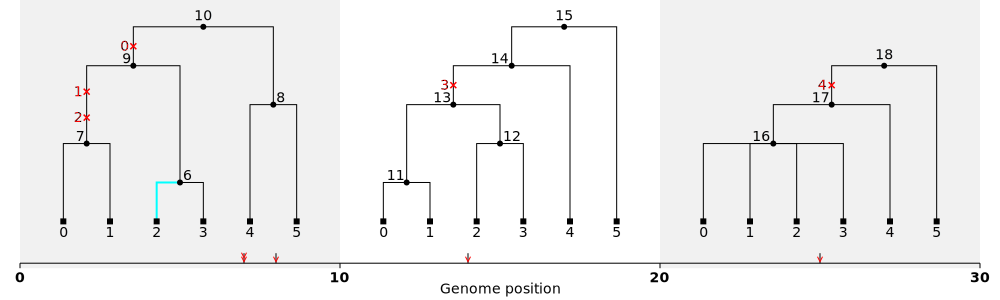

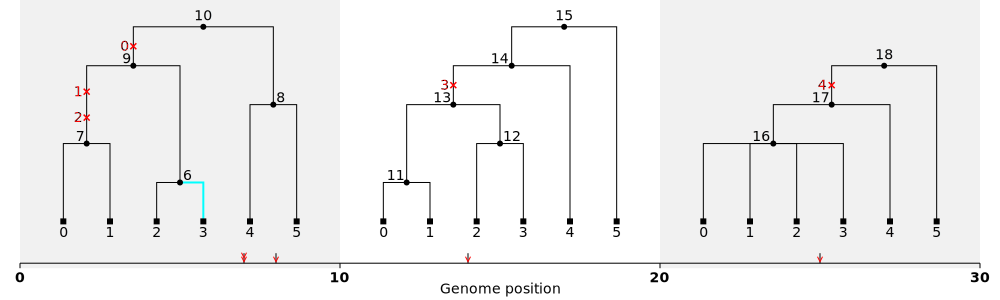

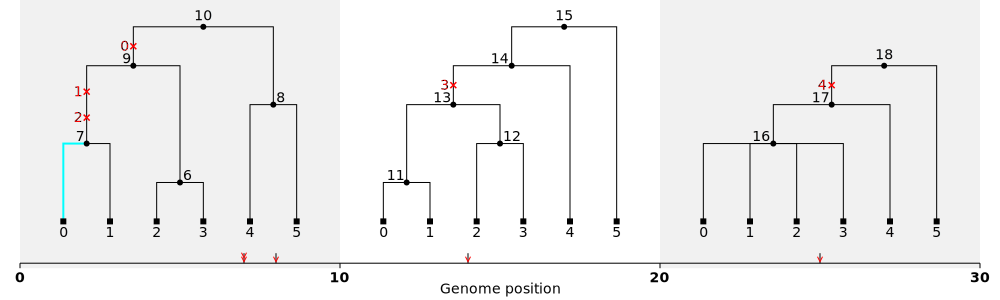

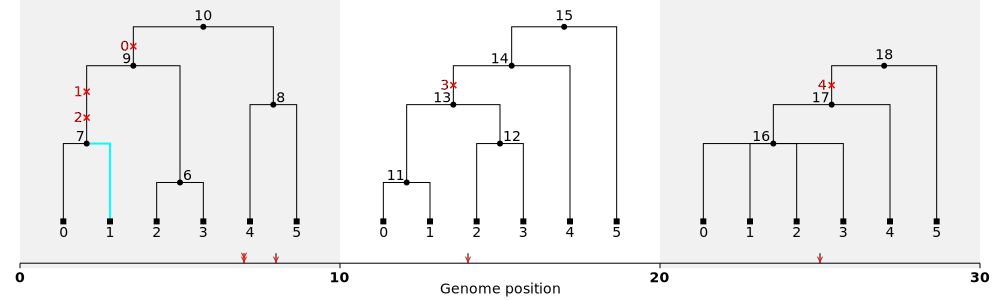

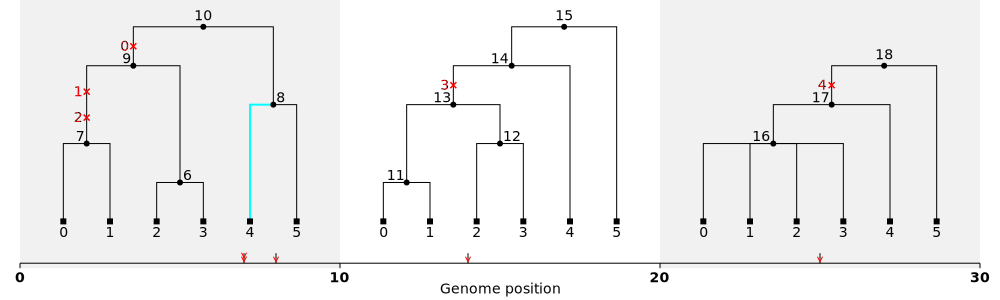

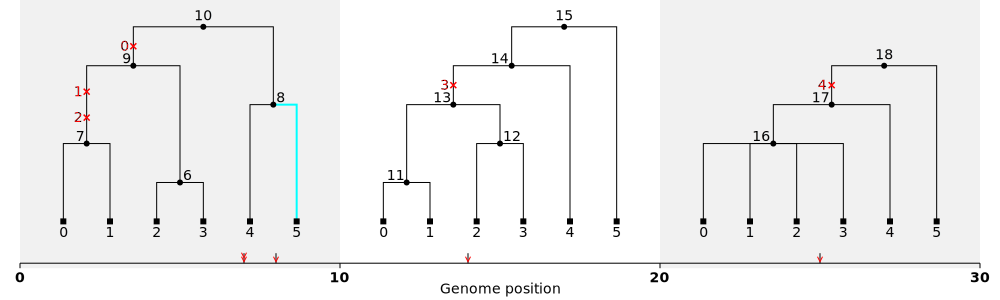

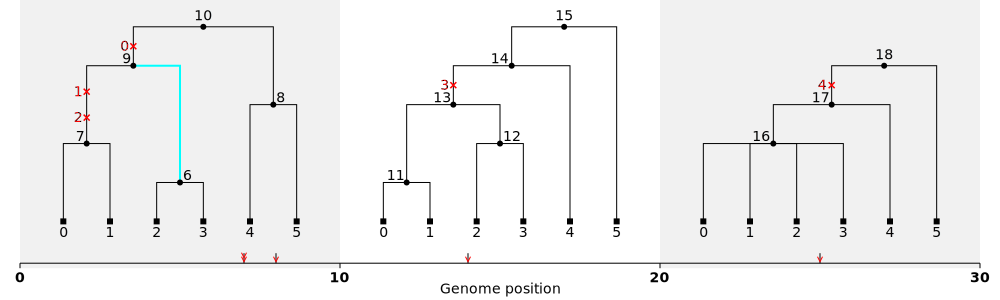

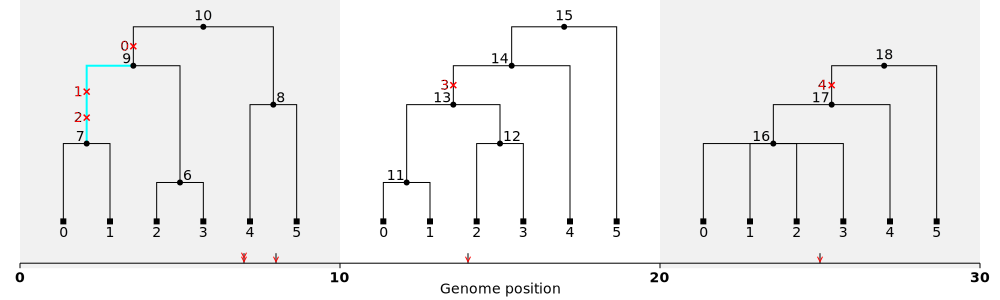

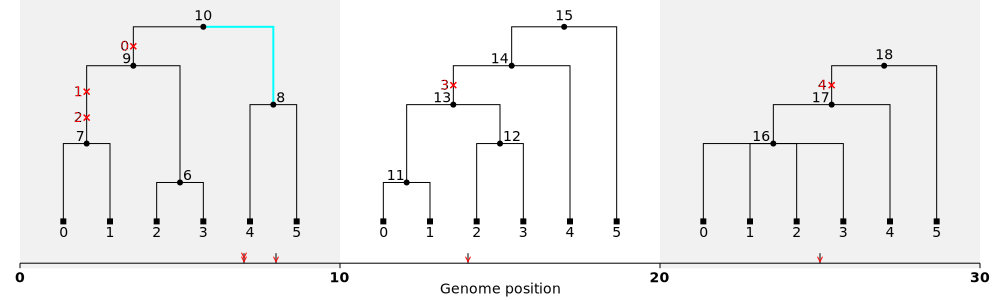

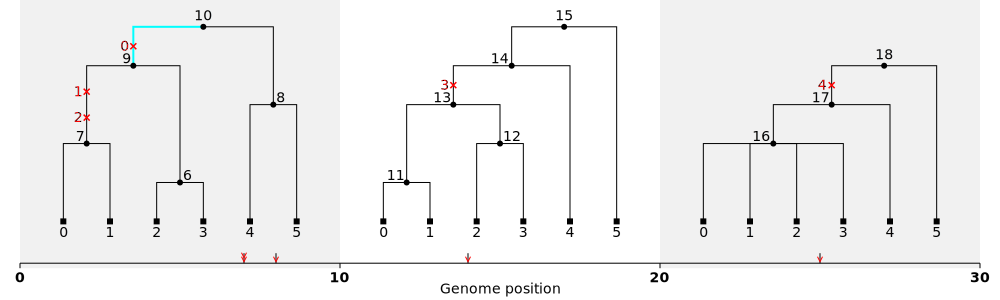

tree 0 ==================================
0 0 1 0 [2, 3, 0, 1]
0 1 2 1 [0, 1]
1 2 4 3 [0, 1]
END    ==================================
site 0 mut 0 [4, 5]
site 0 mut 1 [2, 3]
site 0 mut 2 [0, 1]
site 1 mut 0 [2, 3, 4, 5]
site 1 mut 1 [0, 1]
site 2 mut 0 [0, 1, 2, 3, 4, 5]
site 2 mut 1 []
site 3 mut 0 [0, 1, 2, 3, 4, 5]
site 3 mut 1 []


In [9]:
from IPython import display

I = ts.indexes_edge_insertion_order
O = ts.indexes_edge_removal_order
tj = 0
tk = 0
t_left = 0
tree_index = 0

parent = -np.ones(ts.num_nodes, dtype=np.int32)
left_child = -np.ones(ts.num_nodes, dtype=np.int32)
right_child = -np.ones(ts.num_nodes, dtype=np.int32)
left_sib = -np.ones(ts.num_nodes, dtype=np.int32)
right_sib = -np.ones(ts.num_nodes, dtype=np.int32)

num_sample_chunks = int(ts.num_samples // BITMASK_CHUNK_SIZE) + 1

muts_per_site = [len(site.mutations) + 1 for site in ts.sites()]
offsets = np.array([0] + muts_per_site[:-1])
offsets = offsets.cumsum()
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)
num_alleles = np.zeros(ts.num_sites, np.uint32)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))

while (tj < ts.num_edges) or (t_left < ts.sequence_length):
    while (tk < ts.num_edges) and (ts.edges_right[O[tk]] == t_left):
        h = O[tk]
        tk += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]

        while (v != -1):
            # print(t_left)
            display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: red; stroke-width: 2px}}'))

            if left_sib[u] == -1:
                left_child[v] = right_sib[u]
            else:
                right_sib[left_sib[u]] = right_sib[u]
            if right_sib[u] == -1:
                right_child[v] = left_sib[u]
            else:
                left_sib[right_sib[u]] = left_sib[u]
            left_sib[u] = -1
            right_sib[u] = -1

            v = parent[v]
        parent[u] = -1
    while (tj < ts.num_edges) and (ts.edges_left[I[tj]] == t_left):
        h = I[tj]
        tj += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]
        parent[u] = v
        while (v != -1):
            # print(t_left)
            display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: cyan; stroke-width: 2px}}'))

            c = right_child[v]
            if c == -1:
                left_child[v] = u
                left_sib[u] = -1
                right_sib[u] = -1
            else:
                right_sib[c] = u
                left_sib[u] = c
                right_sib[u] = -1
            right_child[v] = u

            v = parent[v]

    t_right = ts.sequence_length
    if (tj < ts.num_edges):
        t_right = min(t_right, ts.edges_left[I[tj]])
    if (tk < ts.num_edges):
        t_right = min(t_right, ts.edges_right[O[tk]])

#     max_muts = get_max_mutations(ts.at_index(tree_index))  # there is an index for this in c
#     state = np.zeros((num_sample_chunks, ts.at_index(tree_index).num_sites, max_muts + 1), dtype=np.uint64)
#     # state[sample_chunk, site, mutation]
#     mutation_edge = np.array([
#         m.edge for s in ts.at_index(tree_index).sites() for m in s.mutations
#     ], dtype=np.int32)  # index sites for tree directly in c

#     # Initialize all counts in the ancestral state
#     for sample in ts.samples():
#         for site in ts.at_index(tree_index).sites():
#             add_sample_to_array(state[:, site.id, 0], np.uint64(sample))
    print('tree', tree_index, '==================================')

    # muts_per_site = [len(site.mutations) + 1 for site in ts.at_index(tree_index).sites()]
    # offsets = np.array([0] + muts_per_site[:-1], np.uint32)
    # state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)


    for site in ts.at_index(tree_index).sites():
        allele_states = [site.ancestral_state]
        allele = 0
        for mutation in site.mutations:
            if mutation.derived_state in allele_states:
                allele = allele_states.index(mutation.derived_state)
            else:
                allele_states.append(mutation.derived_state)
                allele = len(allele_states) - 1

            to_add = []
            for n in postorder_traversal(mutation.node, left_child, right_child):
                if ts.node(n).flags & 1:
                    to_add.append(np.uint64(n))
            add_samples_to_array(state[offsets[site.id] + allele], to_add)

            alt_allele = allele_states.index(site.ancestral_state)
            if mutation.parent != tskit.NULL:
                alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
            subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
            print(site.id, mutation.id, offsets[site.id] + allele, offsets[site.id] + alt_allele, to_add)

    # if tree_index == 1:
    #     break
    break
    t_left = t_right
    tree_index += 1


print('END    ==================================')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print('site', s, 'mut', i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

In [189]:
from IPython import display

I = ts.indexes_edge_insertion_order
O = ts.indexes_edge_removal_order
tj = 0
tk = 0
t_left = 0
tree_index = 0

parent = -np.ones(ts.num_nodes, dtype=np.int32)
left_child = -np.ones(ts.num_nodes, dtype=np.int32)
right_child = -np.ones(ts.num_nodes, dtype=np.int32)
left_sib = -np.ones(ts.num_nodes, dtype=np.int32)
right_sib = -np.ones(ts.num_nodes, dtype=np.int32)

num_sample_chunks = int(ts.num_samples // BITMASK_CHUNK_SIZE) + 1

muts_per_site = [len(site.mutations) + 1 for site in ts.sites()]
offsets = np.array([0] + muts_per_site[:-1])
offsets = offsets.cumsum()
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)
num_alleles = np.zeros(ts.num_sites, np.uint32)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))

while (tj < ts.num_edges) or (t_left < ts.sequence_length):
    while (tk < ts.num_edges) and (ts.edges_right[O[tk]] == t_left):
        h = O[tk]
        tk += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]

        while (v != -1):
            # print(t_left)
            # display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: red; stroke-width: 2px}}'))

            if left_sib[u] == -1:
                left_child[v] = right_sib[u]
            else:
                right_sib[left_sib[u]] = right_sib[u]
            if right_sib[u] == -1:
                right_child[v] = left_sib[u]
            else:
                left_sib[right_sib[u]] = left_sib[u]
            left_sib[u] = -1
            right_sib[u] = -1

            v = parent[v]
        parent[u] = -1
    while (tj < ts.num_edges) and (ts.edges_left[I[tj]] == t_left):
        h = I[tj]
        tj += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]
        parent[u] = v
        while (v != -1):
            # print(t_left)
            # display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: cyan; stroke-width: 2px}}'))

            c = right_child[v]
            if c == -1:
                left_child[v] = u
                left_sib[u] = -1
                right_sib[u] = -1
            else:
                right_sib[c] = u
                left_sib[u] = c
                right_sib[u] = -1
            right_child[v] = u

            v = parent[v]

    t_right = ts.sequence_length
    if (tj < ts.num_edges):
        t_right = min(t_right, ts.edges_left[I[tj]])
    if (tk < ts.num_edges):
        t_right = min(t_right, ts.edges_right[O[tk]])

    print('tree', tree_index, '==================================')

    node_to_mut = dict()
    for i, row in enumerate(ts.at_index(tree_index).mutations()):
        node_to_mut.setdefault(row.node, list()).append(i)

    stack = [max(node_to_mut)]
    first_curr_node = 2 * -np.ones((ts.at_index(tree_index).num_mutations, 2), dtype=np.int8)
    mut_samples = np.zeros((ts.at_index(tree_index).num_mutations, num_sample_chunks), np.uint64)

    # preorder traversal
    while stack:
        node = stack.pop()
        if node in node_to_mut:
            for mut in node_to_mut[node]:
                first_curr_node[mut, 0] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[mut], np.uint64(node))
        for i, s in enumerate(first_curr_node):
            if s[0] != -2:
                if (s[1] == parent[node] or s[1] == left_sib[node]):
                    s[1] = node
                    if ts.node(node).flags & 1:
                        add_sample_to_array(mut_samples[i], np.uint64(node))
                elif s[0] == parent[node]:
                    s[1] = node
                    if ts.node(node).flags & 1:
                        add_sample_to_array(mut_samples[i], np.uint64(node))
        u = right_child[node]
        while u != tskit.NULL:
            stack.append(u)
            u = left_sib[u]

    for m in mut_samples:
        print(list(get_samples_from_array(m, num_sample_chunks)))

    i = 0
    for site in ts.at_index(tree_index).sites():
        allele_states = [site.ancestral_state]
        allele = 0
        for mutation in site.mutations:
            if mutation.derived_state in allele_states:
                allele = allele_states.index(mutation.derived_state)
            else:
                allele_states.append(mutation.derived_state)
                allele = len(allele_states) - 1

            add_sample_arrays(state[offsets[site.id] + allele], mut_samples[i], num_sample_chunks)

            alt_allele = allele_states.index(site.ancestral_state)
            if mutation.parent != tskit.NULL:
                alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
                # print('here', allele, alt_allele, offsets[site.id], allele_states)
            subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
            i += 1

    # if tree_index == 1:
    #     break
    # break
    t_left = t_right
    tree_index += 1


print('END    ==================================')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print('site', s, 'mut', i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

tree 0 ==================================
[0, 1, 2, 3]
[0, 1]
[3]
[0, 1]
tree 1 ==================================
[0, 1, 2, 3]
tree 2 ==================================
[0, 1, 2, 3, 4]
END    ==================================
site 0 mut 0 [3, 4, 5]
site 0 mut 1 [2]
site 0 mut 2 [0, 1]
site 0 mut 3 []
site 1 mut 0 [2, 3, 4, 5]
site 1 mut 1 [0, 1]
site 2 mut 0 [4, 5]
site 2 mut 1 [0, 1, 2, 3]
site 3 mut 0 [5]
site 3 mut 1 [0, 1, 2, 3, 4]


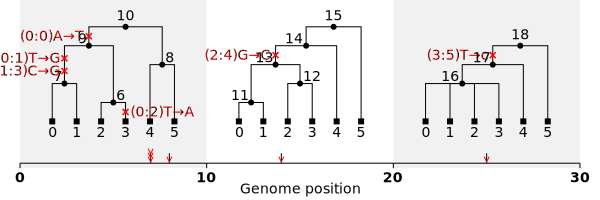

In [186]:
ts.draw_svg(mutation_labels=mut_labels)

In [162]:
state

array([[56],
       [ 4],
       [ 3],
       [ 0],
       [48],
       [15],
       [63],
       [ 0],
       [63],
       [ 0]], dtype=uint64)

In [73]:
# for n in postorder_traversal(6, left_child, right_child):
#     if ts.node(n) & 1:
#         for site in ts.at_index(tree_index.sites()):
#             add_sample_to_array(, n)
        

In [95]:
# for site in ts.at_index(tree_index).sites():
#     anc = site.ancestral_state

#     for mutation in site.mutations:
#         alt = 0 if mutation.parent == tskit.NULL else mutation.parent
#         to_add = []
#         for n in postorder_traversal(mutation.node, left_child, right_child):
#             if ts.node(n).flags & 1:
#                 to_add.append(np.uint64(n))
#         print(site.id, mutation.id, alt, to_add)
#         add_samples_to_array(state[:, site.id, mutation.id], to_add)
#         subtract_sample_arrays(state[:, site.id, alt], state[:, site.id, mutation.id], num_sample_chunks)

In [232]:
muts_per_site = [len(site.mutations) + 1 for site in ts.at_index(tree_index).sites()]
offsets = np.array([0] + muts_per_site[:-1], np.uint32)
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))

for site in ts.at_index(tree_index).sites():
    allele_states = [site.ancestral_state]
    allele = 0
    for mutation in site.mutations:
        if mutation.derived_state in allele_states:
            allele = allele_states.index(mutation.derived_state)
        else:
            allele_states.append(mutation.derived_state)
            allele = len(allele_states) - 1

        to_add = []
        for n in postorder_traversal(mutation.node, left_child, right_child):
            if ts.node(n).flags & 1:
                to_add.append(np.uint64(n))
        add_samples_to_array(state[offsets[site.id] + allele], to_add)

        alt_allele = allele_states.index(site.ancestral_state)
        if mutation.parent != tskit.NULL:
            alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
        subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
        print(site.id, mutation.id, allele, alt_allele, allele_states, to_add)

print('----------------')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print(s, i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

0 0 1 0 ['A', 'T'] [2, 0, 1]
0 1 2 1 ['A', 'T', 'G'] [0, 1]
1 2 1 0 ['C', 'G'] [0, 1]
----------------
0 0 [3]
0 1 [2]
0 2 [0, 1]
1 0 [2, 3]
1 1 [0, 1]


In [233]:
s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print(s, i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

0 0 [3]
0 1 [2]
0 2 [0, 1]
1 0 [2, 3]
1 1 [0, 1]


In [234]:
state

array([[ 8],
       [ 4],
       [ 3],
       [12],
       [ 3]], dtype=uint64)

In [130]:
list(ts.at_index(tree_index).sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=5, derived_state='T', parent=-1, metadata=b'', time=nan, edge=11), Mutation(id=1, site=0, node=4, derived_state='G', parent=0, metadata=b'', time=nan, edge=7)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=2, site=1, node=4, derived_state='G', parent=-1, metadata=b'', time=nan, edge=7)], metadata=b'')]

In [136]:
ts.site(0).mutations[ts.site(0).mutations[1].parent - ts.site(0).mutations[0].id].derived_state

'T'

In [143]:
state

array([[0],
       [4],
       [3],
       [0],
       [3]], dtype=uint64)

array([0], dtype=uint64)

In [105]:
offsets

array([3, 2], dtype=uint32)

In [81]:
list(ts.at_index(tree_index).sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=5, derived_state='T', parent=-1, metadata=b'', time=nan, edge=11), Mutation(id=1, site=0, node=4, derived_state='G', parent=0, metadata=b'', time=nan, edge=7)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=2, site=1, node=4, derived_state='G', parent=-1, metadata=b'', time=nan, edge=7)], metadata=b'')]

In [ ]:
for n 